In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pop = pd.read_csv('../../DataSets/Population/Total_Population/Cleaned_Total_Population.csv')
pop_male = pd.read_csv('../../DataSets/Population/Total_Male/Cleaned_Male_Population.csv')
pop_female = pd.read_csv('../../DataSets/Population/Total_Female/Cleaned_Female_Population.csv')

In [3]:
pop.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0
1,Afghanistan,AFG,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,...,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0
2,Angola,AGO,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,...,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0


## Analysis on Total Population data
1. Checking trend of total population of world over the years.
2. Checking trend of population in 10 most populated countries.
3. Checking yearly population growth rate in 'China' and 'India'.

### 1. Trend of total population of the world

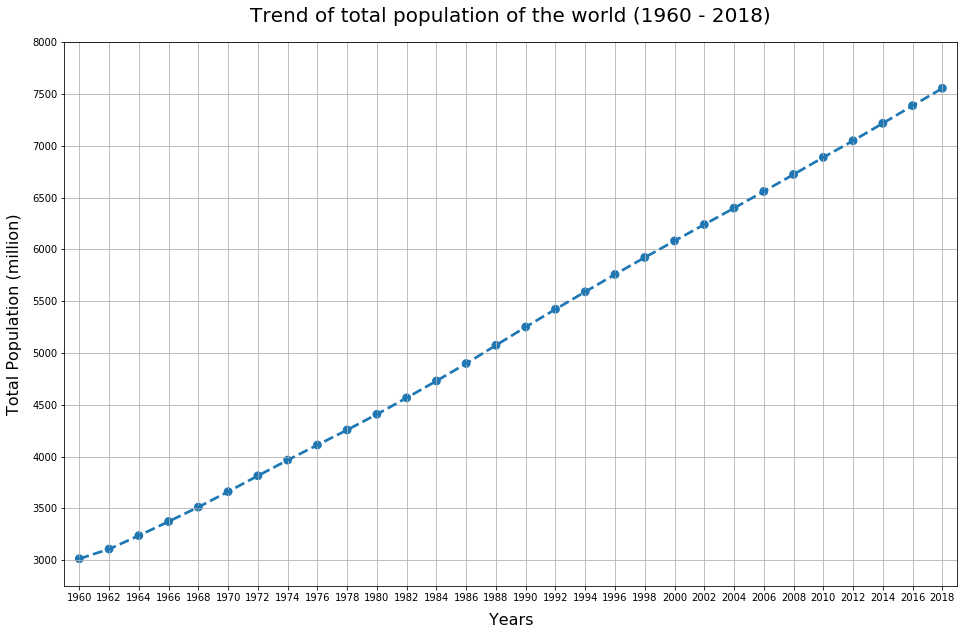

In [4]:
total = pop.iloc[:, 2:].sum()/1000000
plt.figure(figsize = (16,10))
sns.pointplot(x = total.index[0 : : 2].values, y = total.values[0 : : 2], linestyles = '--')
plt.title('Trend of total population of the world (1960 - 2018)', fontdict = {'fontsize' : 20}, pad = 20)
plt.ylabel('Total Population (million)', fontdict = {'fontsize' : 16}, labelpad = 10)
plt.xlabel('Years', fontdict = {'fontsize' : 16}, labelpad = 10)
plt.yticks([i for i in range(3000, 8001, 500)])
plt.grid(True)
plt.show()

As we can see there is a linear growth in total population of the world from year 1960.

In [5]:
# Checking correlation between total population and years
print(np.corrcoef(np.array(total.index, dtype = 'int64'), total.values))
print('\nVery strong positive correlation')

[[1.        0.9995579]
 [0.9995579 1.       ]]

Very strong positive correlation


##### Creating linear regression model for population and years.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [7]:
# Making a linear regression model using population and years, where population is dependent variable.

lr = LinearRegression()
years = total.index.values.astype('int32').reshape(-1,1)
population = total.values.reshape(-1,1)
lr.fit(years , population)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
predict = lr.predict(years)
print('RMSE on training data : {}'.format(mean_squared_error(population, predict)**0.5))
print('MAE on training data : {}'.format(mean_absolute_error(population, predict)))

RMSE on training data : 40.576259929003236
MAE on training data : 29.65853463020972


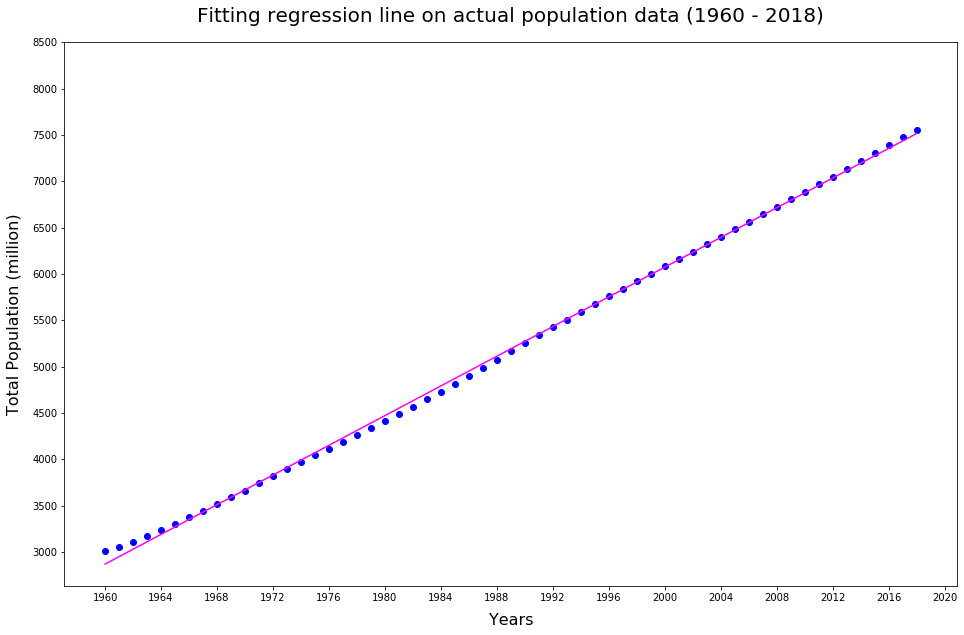

In [9]:
# Let's visualize the fitted regression line against actual values
plt.figure(figsize = (16,10))
plt.scatter(years, population, color = 'blue')
plt.plot(years, predict, color = 'magenta')
plt.title('Fitting regression line on actual population data (1960 - 2018)', fontdict = {'fontsize' : 20}, pad = 20)
plt.ylabel('Total Population (million)', fontdict = {'fontsize' : 16}, labelpad = 10)
plt.xlabel('Years', fontdict = {'fontsize' : 16}, labelpad = 10)
plt.xticks([i for i in range(1960, 2021, 4)])
plt.yticks([i for i in range(3000, 8501, 500)])
plt.show()

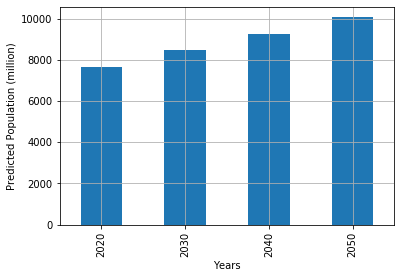

In [10]:
# Predicting population for 2020, 2030, 2040 and 2050
predicted_pop = pd.DataFrame({
       'Years' : np.array([2020, 2030, 2040, 2050]),
       'Predicted population (million)' : lr.predict(np.array([2020, 2030, 2040, 2050]).reshape(-1,1)).ravel()
})

predicted_pop.plot(x = 'Years', y = 'Predicted population (million)', kind = 'bar', legend = False, grid = True)
plt.xlabel('Years')
plt.ylabel('Predicted Population (million)')
plt.show()

World population in 2050 is likely to cross 10000 million mark.

In [11]:
# Let's check top 10 most populated countries using mean and median 
pop['mean'] = pop.mean(axis = 1)
pop['median'] = pop.median(axis = 1)

In [12]:
pop.sort_values('mean', ascending = False).iloc[:10, [0,1,-1,-2]]

,Country Name,Country Code,median,mean
35,China,CHN,1.110140e+09,1.082618e+09
88,India,IND,8.638435e+08,8.723523e+08
199,United States,USA,2.482210e+08,2.525303e+08
86,Indonesia,IDN,1.773355e+08,1.764618e+08
26,Brazil,BRA,1.452051e+08,1.440819e+08
163,Russian Federation,RUS,1.429052e+08,1.397390e+08
97,Japan,JPN,1.228645e+08,1.180069e+08
149,Pakistan,PAK,1.060804e+08,1.126925e+08
17,Bangladesh,BGD,1.016573e+08,1.026190e+08
141,Nigeria,NGA,9.400024e+07,1.015289e+08


In [13]:
pop.sort_values('median', ascending = False).iloc[:10, [0,1,-10,-2]]

,Country Name,Country Code,2011,mean
35,China,CHN,1.344130e+09,1.082618e+09
88,India,IND,1.250289e+09,8.723523e+08
199,United States,USA,3.115800e+08,2.525303e+08
86,Indonesia,IDN,2.451162e+08,1.764618e+08
26,Brazil,BRA,1.975145e+08,1.440819e+08
163,Russian Federation,RUS,1.429609e+08,1.397390e+08
97,Japan,JPN,1.278330e+08,1.180069e+08
149,Pakistan,PAK,1.833406e+08,1.126925e+08
17,Bangladesh,BGD,1.492738e+08,1.026190e+08
141,Nigeria,NGA,1.628051e+08,1.015289e+08


From both mean and median, we get same top 10 most populated countries.

### 2. Trend of population in 10 most populated countries

In [14]:
top_10_pop = pop.iloc[pop.sort_values('median', ascending = False).head(10).index, : -2]

In [15]:
# Creating data in column format for plotting

country_name = np.repeat(top_10_pop['Country Name'].values, 30)
year = np.tile(top_10_pop.columns.values[2 : : 2], 10)
# pop_list = [top_10_pop.iloc[[i], 2 : : 2].values for i in range(10)]
population = np.array([top_10_pop.iloc[[i], 2 : : 2].values for i in range(10)])
population = np.ravel(population)  # Flattening the array of population for 59 years

top_10 = pd.DataFrame({
    'Country Name' : country_name,
    'Year' : year.astype('int32'),
    'Population' : population/1000000
})

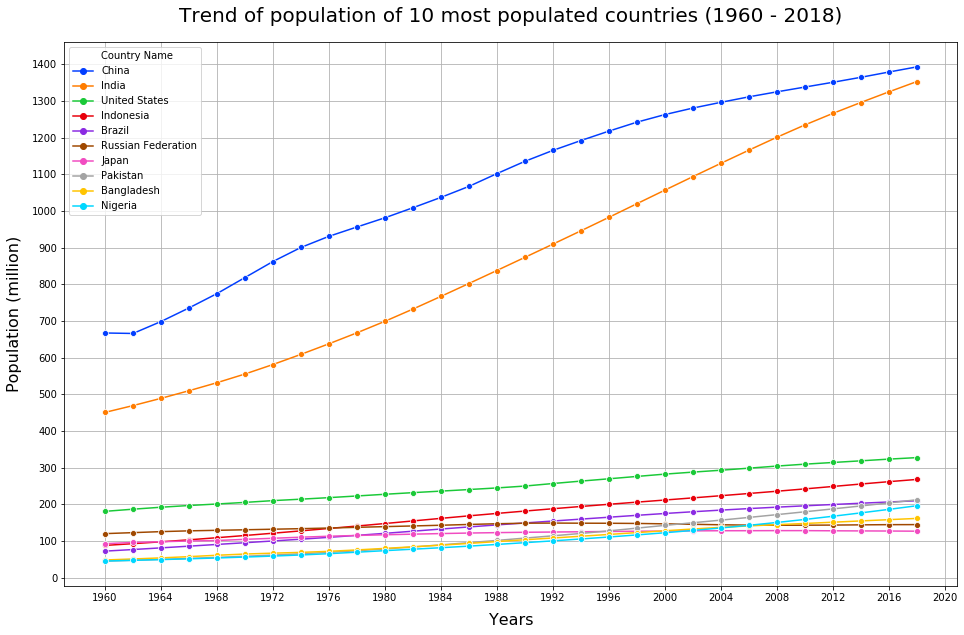

In [16]:
plt.figure(figsize = (16,10))
sns.lineplot(x = 'Year', y = 'Population', hue = 'Country Name', data = top_10, style = 'Country Name', markers = ['o']*10, \
             dashes = False, palette = 'bright')
plt.title('Trend of population of 10 most populated countries (1960 - 2018)', fontdict = {'fontsize' : 20}, pad = 20)
plt.ylabel('Population (million)', fontdict = {'fontsize' : 16}, labelpad = 10)
plt.xlabel('Years', fontdict = {'fontsize' : 16}, labelpad = 10)
plt.yticks([i for i in range(0, 1401, 100)])
plt.xticks([i for i in range(1960, 2021, 4)])
plt.grid(True)
plt.show()

From above graph, we can see that two countries <b>'China'</b> and <b>'India'</b> are contributing heavily towards total population of the world. The other 8 countries have not crossed 400 million mark, until 2018. But 'China' and 'India' almost touching 1400 million mark.

##### Overall Growth rate in population in China and India during from 1960 to 2018

In [17]:
china_rate = (top_10.iloc[29, 2] - top_10.iloc[0,2]) / top_10.iloc[0,2] * 100
print('Growth Rate of China (1960 - 2018) : {} %'.format(round(china_rate,2)))
india_rate = (top_10.iloc[59, 2] - top_10.iloc[30, 2]) / top_10.iloc[30, 2] * 100
print('Growth Rate of India (1960 - 2018) : {} %'.format(round(india_rate,2)))
print('Growth Rate of India is {} % more than China during 1960 - 2018'.format(round(india_rate - china_rate, 2)))

Growth Rate of China (1960 - 2018) : 108.78 %
Growth Rate of India (1960 - 2018) : 200.22 %
Growth Rate of India is 91.43 % more than China during 1960 - 2018


### 3. Yearly Growth Rate in population in China and India during 1960 - 2018

In [18]:
# Creating data in column format for 59 years, for China and India

country_name = np.repeat(['China', 'India'], 59)
year = np.tile(top_10_pop.columns.values[2 : ], 2)
population = np.array([top_10_pop.iloc[[i], 2 : ].values for i in range(2)])
population = np.ravel(population)  # Flattening the array of population for 59 years

top_2 = pd.DataFrame({
    'Country Name' : country_name,
    'Year' : year.astype('int32'),
    'Population' : population
})

In [19]:
def percent(x):
    lst = []
    percent = 0
    for i in range(len(x)):
        if x.iloc[i, 0] == 1960:
            lst.append(0)
        else:
            percent = (x.iloc[i, 1] - x.iloc[i-1, 1]) / x.iloc[i-1, 1] * 100
            lst.append(percent)
            
    return np.array(lst)

top_2['Yearly Growth Rate'] = percent(top_2[['Year','Population']])

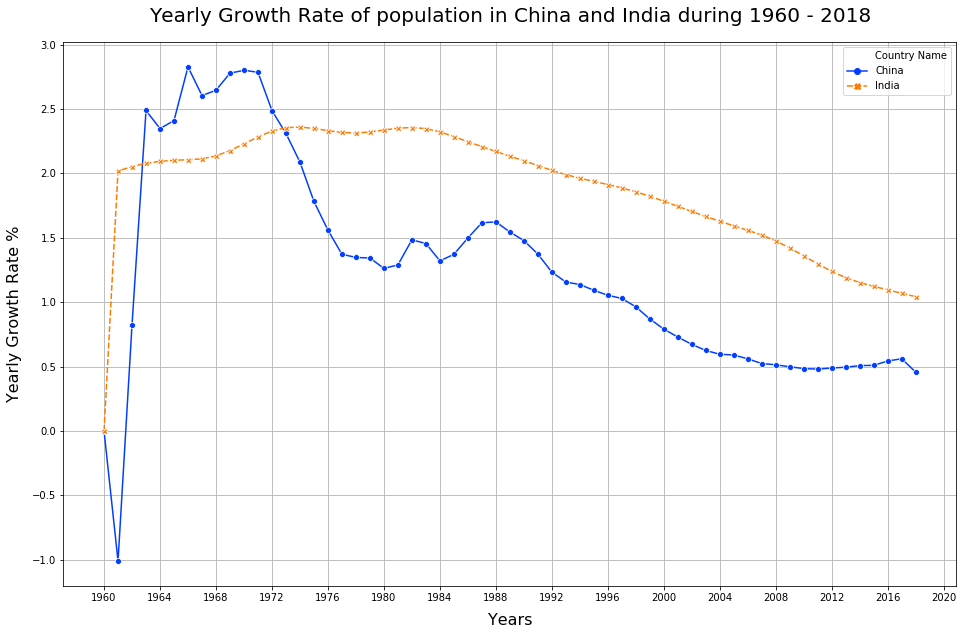

In [20]:
plt.figure(figsize = (16,10))
sns.lineplot(x = 'Year', y = 'Yearly Growth Rate', hue = 'Country Name', data = top_2, style = 'Country Name', markers = True,\
             palette = 'bright')
plt.title('Yearly Growth Rate of population in China and India during 1960 - 2018', fontdict = {'fontsize' : 20}, pad = 20)
plt.ylabel('Yearly Growth Rate %', fontdict = {'fontsize' : 16}, labelpad = 10)
plt.xlabel('Years', fontdict = {'fontsize' : 16}, labelpad = 10)
plt.xticks([i for i in range(1960, 2021, 4)])
plt.grid(True)
plt.show()

- There is continous decrease in yearly population growth rate of China from 1971 to 1980. After that, continous decrease is observed from 1988 to 2018. <br>
- There is continous decrease in yearly population growth rate of India from 1982 to 2018. <br>
- Downward trend in population growth rate is shown by both countries. 

## Analysis of Male and Female Population data
1. Trend of total male and female population of the world.
2. Trend of total male and female population in India.

### 1. Trend of total male and female population of the world.

In [21]:
# Creating data in column format for plotting

year = np.tile(pop_male.columns.values[2 : : 2], 2)

population_male = np.array([pop_male.loc[ : , [str(i)]].sum() for i in range(1960, 2019, 2)])
population_female = np.array([pop_female.loc[ : , [str(i)]].sum() for i in range(1960, 2019, 2)])
population = np.vstack((population_male, population_female))

indicator = np.repeat(['Male', 'Female'], 30)

total_mf_pop = pd.DataFrame({
      'Year' : year.astype('int32'),
      'Population' : np.ravel(population)/1000000,
      'Indicator' : indicator
})

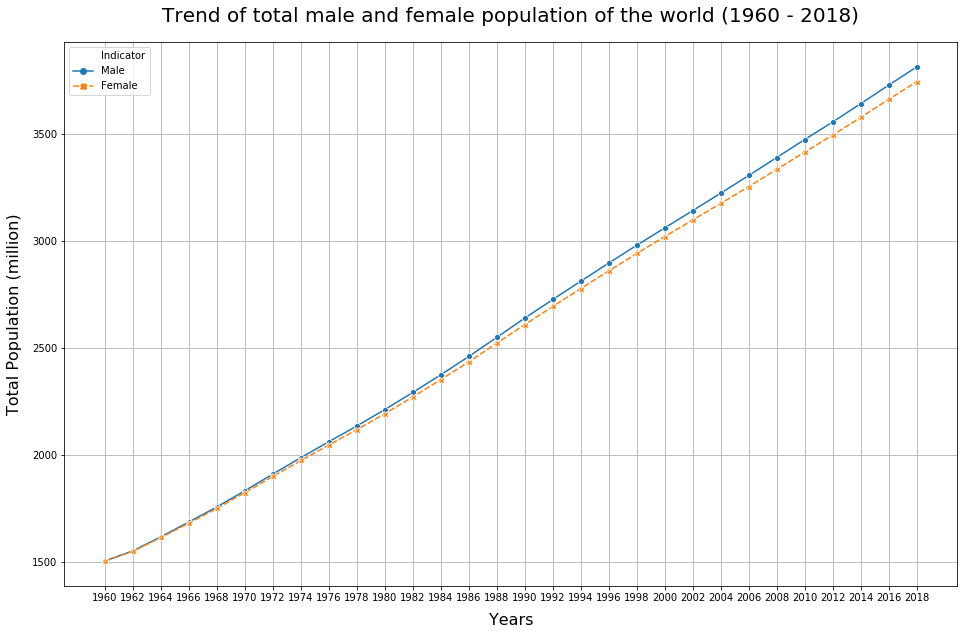

In [22]:
plt.figure(figsize = (16,10))
sns.lineplot(x = 'Year', y = 'Population', data = total_mf_pop, hue = 'Indicator', style = 'Indicator', markers = True)
plt.title('Trend of total male and female population of the world (1960 - 2018)', fontdict = {'fontsize' : 20}, pad = 20)
plt.ylabel('Total Population (million)', fontdict = {'fontsize' : 16}, labelpad = 10)
plt.xlabel('Years', fontdict = {'fontsize' : 16}, labelpad = 10)
# plt.yticks([i for i in range(1500, 4001, 500)])
plt.xticks([i for i in range(1960, 2020, 2)])
plt.grid(True)
plt.show()

The curve of total male and total female population of the world is overlapping till 1974, after that there is slight increase in male population, over remaining years.

### 2. Trend of total male and female population in India.

In [23]:
# Creating data in column format for India for plotting

year = np.tile(pop_male.columns.values[2 : : 2], 2)

population_male = np.array([pop_male[pop_male['Country Name'] == 'India'].loc[ : , [str(i)]].iloc[0] \
                            for i in range(1960, 2019, 2)])
population_female = np.array([pop_female[pop_female['Country Name'] == 'India'].loc[ : , [str(i)]].iloc[0] \
                              for i in range(1960, 2019, 2)])
population = np.vstack((population_male, population_female))

indicator = np.repeat(['Male', 'Female'], 30)
country = np.repeat('India', 60)

mf_pop_india = pd.DataFrame({
    'Country' : country,
    'Year' : year.astype('int32'),
    'Population' : np.ravel(population)/1000000,
    'Indicator' : indicator
})

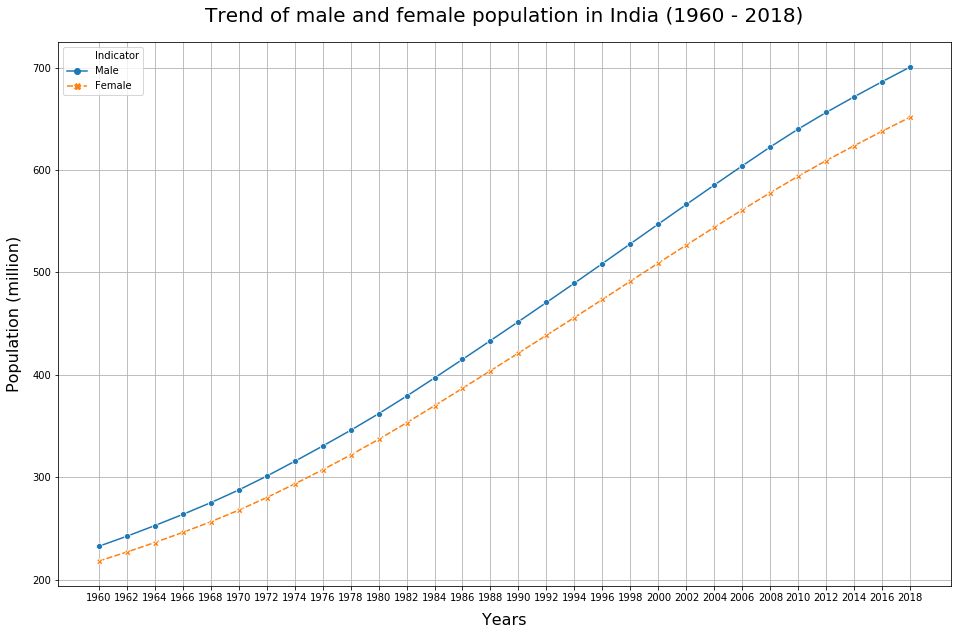

In [24]:
plt.figure(figsize = (16,10))
sns.lineplot(x = 'Year', y = 'Population', data = mf_pop_india, hue = 'Indicator', style = 'Indicator', markers = True)
plt.title('Trend of male and female population in India (1960 - 2018)', fontdict = {'fontsize' : 20}, pad = 20)
plt.ylabel('Population (million)', fontdict = {'fontsize' : 16}, labelpad = 10)
plt.xlabel('Years', fontdict = {'fontsize' : 16}, labelpad = 10)
# plt.yticks([i for i in range(1500, 4001, 500)])
plt.xticks([i for i in range(1960, 2020, 2)])
plt.grid(True)
plt.show()

Male population is greater than female population in India each year and difference is increasing with passing years.